# Imports

## Package Imports 

In [1]:
import pandas as pd
import numpy as np
pd.set_option('display.max_columns', None) 

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, KFold, cross_val_score, \
                                    RandomizedSearchCV, GridSearchCV
from sklearn.ensemble import RandomForestRegressor

## Data Imports 

In [2]:
df1_sleep_orig = pd.read_csv('person1_oura_2019-09-30_2020-09-30_trends.csv')

In [3]:
df2_sleep_orig = pd.read_csv('person2_oura_2020-07-22_2020-10-01_trends.csv')

In [4]:
df3_sleep_orig = pd.read_csv('person3_oura_2019-01-01_2020-09-22_trends.csv')

In [5]:
df_sleep = pd.concat([df1_sleep_orig, df2_sleep_orig, df3_sleep_orig])

In [6]:
df_sleep.head()

,date,Sleep Score,Total Sleep Score,REM Sleep Score,Deep Sleep Score,Sleep Efficiency Score,Restfulness Score,Sleep Latency Score,Sleep Timing Score,Total Bedtime,Total Sleep Time,Awake Time,REM Sleep Time,Light Sleep Time,Deep Sleep Time,Restless Sleep,Sleep Efficiency,Sleep Latency,Sleep Timing,Sleep Timing.1,Bedtime Start,Bedtime End,Average Resting Heart Rate,Lowest Resting Heart Rate,Average HRV,Temperature Deviation (°C),Respiratory Rate,Activity Score,Stay Active Score,Move Every Hour Score,Meet Daily Targets Score,Training Frequency Score,Training Volume Score,Recovery Time Score,Activity Burn,Total Burn,Target Calories,Steps,Daily Movement,Inactive Time,Rest Time,Low Activity Time,Medium Activity Time,High Activity Time,Non-wear Time,Average MET,Long Periods of Inactivity,Readiness Score,Previous Night Score,Sleep Balance Score,Previous Day Activity Score,Activity Balance Score,Temperature Score,Resting Heart Rate Score,HRV Balance Score,Recovery Index Score
0,2020-08-25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,93.0,100.0,100.0,78.0,100.0,99.0,98.0,3.0,1996.0,500.0,84.0,41.0,36.0,178.0,4.0,0.0,0.0,1222.0,1.09375,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2020-08-26,75.0,77.0,86.0,97.0,93.0,69.0,72.0,30.0,30120.0,26700.0,3420.0,6420.0,13320.0,6960.0,31.0,89.0,270.0,15060.0,NaN,2020-08-26T01:08:26-04:00,2020-08-26T09:30:26-04:00,59.52,54.0,61.0,-0.31,14.000,94.0,100.0,100.0,78.0,100.0,97.0,100.0,161.0,1907.0,450.0,4551.0,3598.0,152.0,557.0,114.0,16.0,0.0,601.0,1.21875,0.0,79.0,66.0,0.0,0.0,0.0,93.0,94.0,0.0,75.0
2,2020-08-27,82.0,100.0,100.0,100.0,88.0,67.0,62.0,18.0,40980.0,35670.0,5310.0,9480.0,16770.0,9420.0,27.0,87.0,30.0,19950.0,NaN,2020-08-27T00:33:26-04:00,2020-08-27T11:56:26-04:00,58.30,53.0,60.0,-0.01,14.000,89.0,100.0,100.0,60.0,96.0,95.0,100.0,2.0,1682.0,550.0,28.0,51.0,18.0,640.0,1.0,0.0,0.0,781.0,1.06250,0.0,91.0,81.0,0.0,0.0,0.0,100.0,96.0,0.0,100.0
3,2020-08-28,77.0,79.0,74.0,100.0,97.0,67.0,81.0,42.0,29820.0,27300.0,2520.0,5490.0,12600.0,9210.0,29.0,92.0,450.0,14820.0,NaN,2020-08-28T00:48:15-04:00,2020-08-28T09:05:15-04:00,56.65,52.0,64.0,-0.11,14.000,78.0,100.0,100.0,43.0,71.0,66.0,100.0,1.0,1714.0,450.0,21.0,4.0,28.0,391.0,2.0,0.0,0.0,1019.0,1.12500,0.0,81.0,73.0,77.0,0.0,88.0,100.0,90.0,0.0,85.0
4,2020-08-29,61.0,55.0,54.0,95.0,72.0,59.0,91.0,20.0,26340.0,21030.0,5310.0,4050.0,11130.0,5850.0,37.0,80.0,720.0,12090.0,NaN,2020-08-29T02:32:46-04:00,2020-08-29T09:51:46-04:00,65.18,58.0,59.0,0.07,14.875,74.0,100.0,100.0,43.0,71.0,40.0,100.0,4.0,1728.0,450.0,119.0,63.0,4.0,316.0,6.0,0.0,0.0,1114.0,1.12500,0.0,71.0,48.0,74.0,0.0,88.0,99.0,76.0,0.0,77.0


In [7]:
df_sleep.shape

(714, 56)

In [8]:
df_sleep.dtypes

date                            object
Sleep Score                    float64
Total Sleep Score              float64
REM Sleep Score                float64
Deep Sleep Score               float64
Sleep Efficiency Score         float64
Restfulness Score              float64
Sleep Latency Score            float64
Sleep Timing Score             float64
Total Bedtime                  float64
Total Sleep Time               float64
Awake Time                     float64
REM Sleep Time                 float64
Light Sleep Time               float64
Deep Sleep Time                float64
Restless Sleep                 float64
Sleep Efficiency               float64
Sleep Latency                  float64
Sleep Timing                   float64
Sleep Timing.1                 float64
Bedtime Start                   object
Bedtime End                     object
Average Resting Heart Rate     float64
Lowest Resting Heart Rate      float64
Average HRV                    float64
Temperature Deviation (°C

# Data Transformations

## Column renaming 

In [9]:
df_sleep.rename(columns = lambda x: x.lower().replace(' ', '_'), inplace = True)

## Removing columns 

In [10]:
list_sleep_cols = ['date', 'sleep_score', 'total_bedtime', 'total_sleep_time',
                   'awake_time', 'rem_sleep_time', 'light_sleep_time',
                   'deep_sleep_time', 'restless_sleep', 'sleep_efficiency',
                   'sleep_latency', 'sleep_timing', 'bedtime_start',
                   'bedtime_end', 'average_resting_heart_rate',
                   'lowest_resting_heart_rate', 'average_hrv',
                   'temperature_deviation_(°c)', 'respiratory_rate']

In [11]:
df_sleep2 = df_sleep[list_sleep_cols].copy()

In [12]:
df_sleep3 = df_sleep2.copy()

## Dropping Nans 

In [13]:
df_sleep3.isnull().sum()

date                           0
sleep_score                   95
total_bedtime                 95
total_sleep_time              95
awake_time                    95
rem_sleep_time                95
light_sleep_time              95
deep_sleep_time               95
restless_sleep                95
sleep_efficiency              95
sleep_latency                 95
sleep_timing                  95
bedtime_start                 95
bedtime_end                   95
average_resting_heart_rate    95
lowest_resting_heart_rate     96
average_hrv                   96
temperature_deviation_(°c)    95
respiratory_rate              95
dtype: int64

In [14]:
df_sleep3.dropna(subset=['sleep_score', 'average_hrv'], inplace=True)

In [15]:
df_sleep3.isnull().sum()

date                          0
sleep_score                   0
total_bedtime                 0
total_sleep_time              0
awake_time                    0
rem_sleep_time                0
light_sleep_time              0
deep_sleep_time               0
restless_sleep                0
sleep_efficiency              0
sleep_latency                 0
sleep_timing                  0
bedtime_start                 0
bedtime_end                   0
average_resting_heart_rate    0
lowest_resting_heart_rate     0
average_hrv                   0
temperature_deviation_(°c)    0
respiratory_rate              0
dtype: int64

## Removing Outliers 

In [16]:
df_sleep4 = df_sleep3.copy()

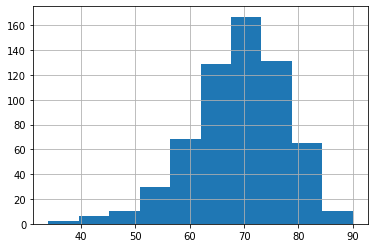

In [17]:
df_sleep4['sleep_score'].hist()

In [18]:
df_sleep4.describe()

,sleep_score,total_bedtime,total_sleep_time,awake_time,rem_sleep_time,light_sleep_time,deep_sleep_time,restless_sleep,sleep_efficiency,sleep_latency,sleep_timing,average_resting_heart_rate,lowest_resting_heart_rate,average_hrv,temperature_deviation_(°c),respiratory_rate
count,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.00000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000,618.000000
mean,69.113269,27589.514563,22967.038835,4622.475728,3788.786408,10757.281553,8420.970874,35.23301,83.490291,673.398058,13587.038835,57.261303,49.375405,81.962783,0.014207,14.362257
std,8.635240,4548.416444,3707.174454,2071.116530,1620.729166,2889.395363,1858.558031,6.56404,5.981392,497.707327,2356.468349,5.989387,5.243952,24.507603,0.275098,0.721581
min,34.000000,13320.000000,10830.000000,750.000000,90.000000,3150.000000,1980.000000,13.00000,48.000000,30.000000,6450.000000,45.740000,40.000000,10.000000,-0.670000,11.625000
25%,63.000000,24780.000000,20790.000000,3247.500000,2737.500000,8850.000000,7410.000000,31.00000,80.000000,330.000000,12187.500000,53.625000,46.000000,67.000000,-0.150000,14.000000
50%,70.000000,27780.000000,23070.000000,4170.000000,3660.000000,10635.000000,8460.000000,35.00000,84.000000,600.000000,13560.000000,56.360000,49.000000,82.500000,0.000000,14.250000
75%,75.000000,30180.000000,25350.000000,5730.000000,4740.000000,12540.000000,9622.500000,39.00000,88.000000,930.000000,14902.500000,59.565000,52.000000,100.000000,0.130000,14.750000
max,90.000000,49740.000000,38040.000000,16710.000000,11970.000000,22200.000000,14130.000000,62.00000,96.000000,6180.000000,24960.000000,86.810000,80.000000,157.000000,3.440000,20.250000


In [19]:
Q1 = df_sleep4.quantile(0.25)
Q3 = df_sleep4.quantile(0.75)
IQR = Q3 - Q1
print(IQR)

sleep_score                     12.00
total_bedtime                 5400.00
total_sleep_time              4560.00
awake_time                    2482.50
rem_sleep_time                2002.50
light_sleep_time              3690.00
deep_sleep_time               2212.50
restless_sleep                   8.00
sleep_efficiency                 8.00
sleep_latency                  600.00
sleep_timing                  2715.00
average_resting_heart_rate       5.94
lowest_resting_heart_rate        6.00
average_hrv                     33.00
temperature_deviation_(°c)       0.28
respiratory_rate                 0.75
dtype: float64


In [20]:
df_sleep5 = df_sleep4.loc[~((df_sleep4 < (Q1 - 1.5 * IQR)) |
                            (df_sleep4 > (Q3 + 1.5 * IQR))).any(axis=1)].copy()

In [21]:
df_s = df_sleep5.copy()

In [22]:
df_s.shape

(518, 19)

# Random Forest

## Data Prep 

In [23]:
list_raw_sleep_cols = ['total_bedtime', 'total_sleep_time', 'awake_time',
                       'rem_sleep_time', 'light_sleep_time',
                       'deep_sleep_time', 'restless_sleep', 'sleep_efficiency',
                       'sleep_latency', 'sleep_timing',
                       'average_resting_heart_rate', 
                       'lowest_resting_heart_rate', 'average_hrv',
                       'temperature_deviation_(°c)', 'respiratory_rate']
list_col_poly = [f'x{i}' for i in range(0, len(list_raw_sleep_cols))]
df_col_names = pd.DataFrame(list_col_poly, index=list_raw_sleep_cols,
                            columns=['Poly Name'])
df_col_names;

In [24]:
X = df_s[list_raw_sleep_cols]
y = df_s[['sleep_score']]

## Train/ CV/ Test Split 

In [25]:
# We have split 80/20 between train/ cv and test
X_train_cv, X_test, y_train_cv, y_test = train_test_split(X, y, test_size=.20,
                                                          random_state=1)
# We will split our train/cv 60/20 into train and cv now.
X_train, X_cv, y_train, y_cv = train_test_split(X_train_cv, y_train_cv,
                                                test_size=.25,
                                                random_state=1)

## Tuning Parameters

### Randomized CV Search 

In [26]:
n_estimators = [int(x) for x in np.linspace(start=100, stop=800, num=8)]
max_features = ['auto', 'sqrt']
max_depth = [int(x) for x in np.linspace(10, 100, num=10)]
max_depth.append(None)
min_samples_split = [2, 5, 10, 15]
min_samples_leaf = [1, 2, 4]
bootstrap = [True, False]
degree = [1, 2, 3, 4]

random_grid = {'poly__degree': degree,
               'rf__n_estimators': n_estimators,
               'rf__max_features': max_features,
               'rf__max_depth': max_depth,
               'rf__min_samples_split': min_samples_split,
               'rf__min_samples_leaf': min_samples_leaf,
               'rf__bootstrap': bootstrap
              }

In [27]:
# Use the random grid to search for best hyperparameters
# First create the base model to tune
rf_pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('rf', RandomForestRegressor())  
])

# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
rf_random = RandomizedSearchCV(estimator=rf_pipe,
                               param_distributions=random_grid,
                               n_iter=10, cv=3, verbose=2, random_state=1,
                               scoring='neg_mean_squared_error', n_jobs = -1)
# Fit the random search model
rf_random.fit(X_train_cv, np.ravel(y_train_cv))

Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed: 11.7min finished


RandomizedSearchCV(cv=3,
                   estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                             ('rf', RandomForestRegressor())]),
                   n_jobs=-1,
                   param_distributions={'poly__degree': [1, 2, 3, 4],
                                        'rf__bootstrap': [True, False],
                                        'rf__max_depth': [10, 20, 30, 40, 50,
                                                          60, 70, 80, 90, 100,
                                                          None],
                                        'rf__max_features': ['auto', 'sqrt'],
                                        'rf__min_samples_leaf': [1, 2, 4],
                                        'rf__min_samples_split': [2, 5, 10, 15],
                                        'rf__n_estimators': [100, 200, 300, 400,
                                                             500, 600, 700,
                                 

In [28]:
rf_random.best_params_

{'rf__n_estimators': 100,
 'rf__min_samples_split': 5,
 'rf__min_samples_leaf': 1,
 'rf__max_features': 'auto',
 'rf__max_depth': 60,
 'rf__bootstrap': True,
 'poly__degree': 2}

### Model Performance 

In [29]:
rf_pipe_opt = Pipeline([
    ('poly', PolynomialFeatures(2)),
    ('rf', RandomForestRegressor(
            n_estimators=rf_random.best_params_['rf__n_estimators'],
            max_features=rf_random.best_params_['rf__max_features'],
            min_samples_split=rf_random.best_params_['rf__min_samples_split'],
            max_depth=rf_random.best_params_['rf__max_depth'],
            min_samples_leaf=rf_random.best_params_['rf__min_samples_leaf'],
            bootstrap=rf_random.best_params_['rf__bootstrap']
    ))  
])

rf_pipe_opt.fit(X_train, np.ravel(y_train))
y_train_pred = rf_pipe_opt.predict(X_train)
y_cv_pred = rf_pipe_opt.predict(X_cv)

print('Train error:', mean_squared_error(y_train_pred, y_train))
print('CV error:', mean_squared_error(y_cv_pred, y_cv))
print('R^2 train', r2_score(y_train_pred, y_train))
print('R^2 CV', r2_score(y_cv_pred, y_cv))

Train error: 1.7702017710381506
CV error: 11.528311995539752
R^2 train 0.9599817052911459
R^2 CV 0.7019427290450868


In [30]:
y_test_pred = rf_pipe_opt.predict(X_test)
print('Test error:', mean_squared_error(y_test_pred, y_test))
print('R^2 Test', r2_score(y_test_pred, y_test))

Test error: 9.26913200147612
R^2 Test 0.7742081870671553


### Grid Search 

In [31]:
param_grid = {'poly__degree': [2],
               'rf__n_estimators': [100, 200, 300, 500],
               'rf__max_features': ['auto'],
               'rf__max_depth': [50, 60, 70],
               'rf__min_samples_split': [4, 5, 6],
               'rf__min_samples_leaf': [1, 2, 3],
               'rf__bootstrap': [True],
              }
# Create a based model
rf_pipe = Pipeline([
    ('poly', PolynomialFeatures()),
    ('rf', RandomForestRegressor())  
])
# Instantiate the grid search model
grid_search = GridSearchCV(estimator=rf_pipe, param_grid=param_grid,
                           scoring='neg_mean_squared_error',
                           cv=3, n_jobs=-1, verbose=2)

In [32]:
grid_search.fit(X_train_cv, np.ravel(y_train_cv))

Fitting 3 folds for each of 108 candidates, totalling 324 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done  33 tasks      | elapsed:  1.0min
[Parallel(n_jobs=-1)]: Done 154 tasks      | elapsed:  4.7min
[Parallel(n_jobs=-1)]: Done 324 out of 324 | elapsed:  9.6min finished


GridSearchCV(cv=3,
             estimator=Pipeline(steps=[('poly', PolynomialFeatures()),
                                       ('rf', RandomForestRegressor())]),
             n_jobs=-1,
             param_grid={'poly__degree': [2], 'rf__bootstrap': [True],
                         'rf__max_depth': [50, 60, 70],
                         'rf__max_features': ['auto'],
                         'rf__min_samples_leaf': [1, 2, 3],
                         'rf__min_samples_split': [4, 5, 6],
                         'rf__n_estimators': [100, 200, 300, 500]},
             scoring='neg_mean_squared_error', verbose=2)

In [33]:
grid_search.best_params_

{'poly__degree': 2,
 'rf__bootstrap': True,
 'rf__max_depth': 60,
 'rf__max_features': 'auto',
 'rf__min_samples_leaf': 1,
 'rf__min_samples_split': 4,
 'rf__n_estimators': 100}

In [34]:
rf_pipe_opt2 = Pipeline([
    ('poly', PolynomialFeatures(
        degree=grid_search.best_params_['poly__degree'])
    ),
    ('rf', RandomForestRegressor(
            n_estimators=grid_search.best_params_['rf__n_estimators'],
            max_features=grid_search.best_params_['rf__max_features'],
            min_samples_split=grid_search.best_params_['rf__min_samples_split'],
            max_depth=grid_search.best_params_['rf__max_depth'],
            min_samples_leaf=grid_search.best_params_['rf__min_samples_leaf'],
            bootstrap=grid_search.best_params_['rf__bootstrap']
    ))  
])

rf_pipe_opt2.fit(X_train, np.ravel(y_train))
y_train_pred = rf_pipe_opt2.predict(X_train)
y_cv_pred = rf_pipe_opt2.predict(X_cv)

print('Train error:', mean_squared_error(y_train_pred, y_train))
print('CV error:', mean_squared_error(y_cv_pred, y_cv))
print('R^2 train', r2_score(y_train_pred, y_train))
print('R^2 CV', r2_score(y_cv_pred, y_cv))

Train error: 1.5030036511513616
CV error: 11.946939074436859
R^2 train 0.9668511795715358
R^2 CV 0.6912433880196038


In [35]:
y_test_pred = rf_pipe_opt2.predict(X_test)
print('Test error:', mean_squared_error(y_test_pred, y_test))
print('R^2 Test', r2_score(y_test_pred, y_test))

Test error: 9.693356504721997
R^2 Test 0.7649378653515047


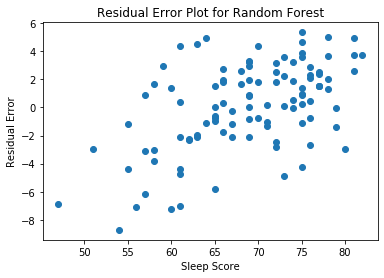

In [36]:
arr_resid = np.ravel(y_test) - y_test_pred
plt.scatter(y_test, arr_resid)
plt.title('Residual Error Plot for Random Forest')
plt.xlabel('Sleep Score')
plt.ylabel('Residual Error');

# Results 

In terms of performance, here is how of our model did:

| Name                         | Test Error (MSE) | R^2  |
|------------------------------|------------|------|
| Random Forest                | 9.22       | .777 |

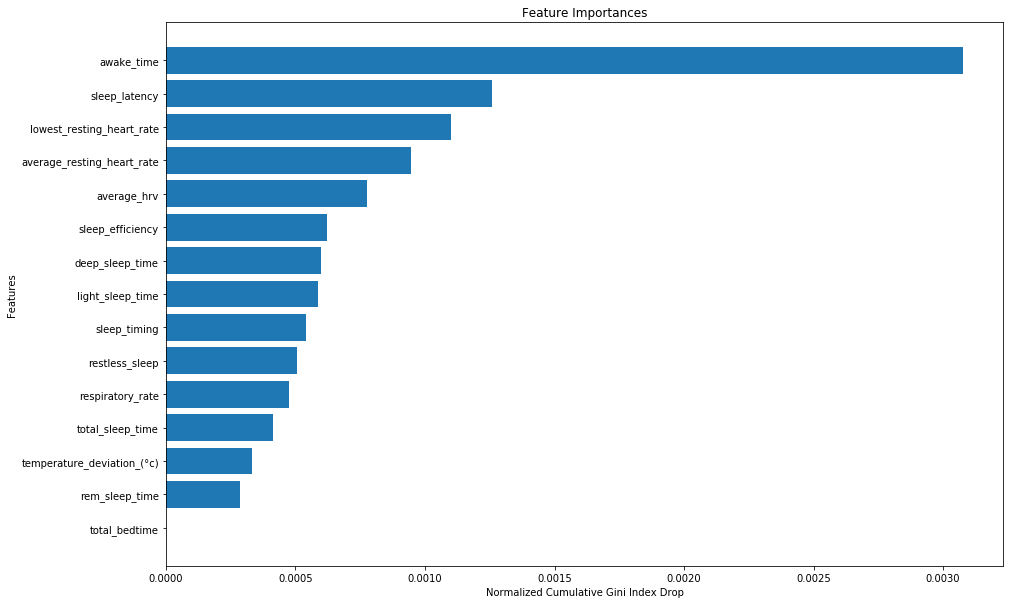

In [37]:
fi = rf_pipe_opt2['rf'].feature_importances_
df_fi = pd.DataFrame(zip(X.columns, fi),
                     columns=['Features', 'Importance'])

df_fi = df_fi.sort_values(by='Importance')

#plot
plt.subplots(figsize=(15, 10))
plt.barh(df_fi['Features'], df_fi['Importance'])
plt.xlabel('Normalized Cumulative Gini Index Drop')
plt.ylabel('Features')
plt.title('Feature Importances');